In [14]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

df=pd.read_csv("./data/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [15]:
df

,player1_name,player1_atprank,player2_name,player2_atprank,match_date,match_location,match_tournament,match_surface,match_odd_player1,match_odd_player2,winner_player1
0,Harrison R.,433.0,Mager G.,91.0,2021-01-07,Delray Beach,Delray Beach Open,Hard,2.00,1.72,0
1,Kwon S.W.,82.0,Korda S.,213.0,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,0
2,Paul T.,55.0,Nam J.S.,NaN,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.12,6.00,1
3,Kecmanovic M.,42.0,Travaglia S.,74.0,2021-01-07,Antalya,Antalya Open,Hard,2.62,1.44,0
4,Monteiro T.,84.0,Bellucci T.,278.0,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.36,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...
7057,Tiafoe F.,64.0,Evans D.,31.0,2023-08-05,Washington,Citi Open,Hard,3.75,1.29,0
7058,Fritz T.,29.0,Griekspoor T.,172.0,2023-08-06,Washington,Citi Open,Hard,3.50,1.30,0
7059,De Minaur A.,25.0,Tsitsipas S.,6.0,2023-08-06,Los Cabos,Los Cabos Open,Hard,1.36,3.20,0
7060,Dimitrov G.,20.0,Evans D.,31.0,2023-08-06,Washington,Citi Open,Hard,3.20,1.36,0


In [16]:
df = df.dropna()

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(["player1_name", "player2_name","match_location", "match_tournament", "match_surface", "winner_player1"],axis=1)
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
X_test

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2
1688,70.0,185.0,2021-07-23,1.25,4.00
3312,103.0,77.0,2022-04-07,1.44,2.75
3164,23.0,20.0,2022-03-16,1.90,1.90
3144,54.0,44.0,2022-03-13,1.11,6.50
2298,143.0,91.0,2021-10-19,2.00,1.80
...,...,...,...,...,...
5727,34.0,12.0,2023-03-10,2.63,1.50
2161,29.0,12.0,2021-09-30,1.61,2.30
4960,55.0,179.0,2022-10-20,2.00,1.80
1909,111.0,98.0,2021-08-23,1.57,2.37


In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train_filtered = X_train.drop("match_date",axis=1)
X_test_filtered = X_test.drop("match_date",axis=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_filtered, y_train)

#cross_val_score(dtree, X_test, y_test, cv=10)

y_predict = dtree.predict(X_test_filtered)

accuracy_score(y_predict, y_test)

0.6734867860187553

In [29]:
y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [71]:
# ROI return of investment

print("We bet 1€ on all test matches")
df_roi = X_test
df_roi["y_predict"] = y_predict
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[y_predict == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.match_odd_player2
    else:
        money_won += row.match_odd_player1

print("money won:",round(money_won,2),"€")

We bet 1€ on all test matches
money spent: 1173 €
money won: 2258.18 €


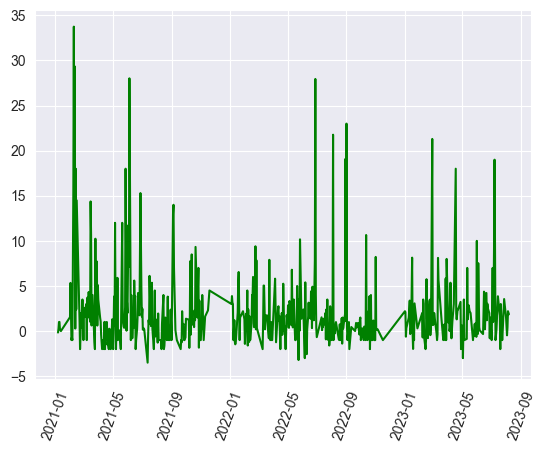

In [130]:
import matplotlib.pyplot as plt

df_roi = df_roi.sort_values(by='match_date')
dates = df_roi.match_date.unique()
data = []

for date in dates :
    money_won = 0.0
    #test = df_roi.at[df_roi.index[0],"match_date"]
    df_roi_filtered = df_roi.loc[df_roi["match_date"]==date]
    #print(df_roi_filtered)
    money_won-=df_roi_filtered.shape[0]

    for index, row in (df_roi_filtered.loc[df_roi_filtered["y_predict"] == df_roi_filtered["y_test"]]).iterrows():
        if row.y_predict == 0 :
            money_won += row.match_odd_player2
        else:
            money_won += row.match_odd_player1

    data.append(money_won)

dates = dates.astype('datetime64[ns]')

plt.plot_date(pd.to_datetime(dates.date, format='%Y-%m-%d'), data, 'g')
plt.xticks(rotation=70)
plt.show()


d = {'date': dates.date, 
     'money_won': data}
roi = pd.DataFrame(data=d)

In [135]:
roi.sort_values(by="money_won")

,date,money_won
127,2021-07-13,-3.50
299,2022-05-24,-3.21
126,2021-07-12,-3.00
481,2023-05-02,-3.00
305,2022-06-06,-3.00
...,...,...
368,2022-09-01,23.00
324,2022-06-28,27.95
103,2021-06-05,28.02
15,2021-02-11,29.34


In [137]:
df_roi[df_roi["match_date"]=="2021-02-09"]

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2,y_predict,y_test
225,109.0,14.0,2021-02-09,3.00,1.40,1,1
226,193.0,19.0,2021-02-09,1.10,7.00,0,0
213,31.0,70.0,2021-02-09,3.00,1.40,0,0
228,63.0,103.0,2021-02-09,1.66,2.20,1,1
224,36.0,116.0,2021-02-09,4.50,1.20,1,0
206,48.0,32.0,2021-02-09,1.80,2.00,0,0
202,54.0,2.0,2021-02-09,1.01,26.00,0,0
220,105.0,84.0,2021-02-09,1.22,4.33,1,0
211,10.0,86.0,2021-02-09,1.33,3.40,1,1
218,80.0,179.0,2021-02-09,1.36,3.20,1,1
